In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib as mpl
import statsmodels.api as sm
import copy


In [2]:
# set some defaults

params = {'figure.figsize': [15, 10],
          'font.size': 12}

mpl.rcParams.update(params)

In [3]:
file_path1 = 'DailyDelhiClimateTrain.csv'
data = pd.read_csv(file_path1)
data = data.drop(1461)
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [4]:
# Let's make sure 'date' is actually a date in pandas
data["date"] = pd.to_datetime(data["date"])

# Setting our date column as our index column
data = data.set_index('date')

data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762


In [5]:
# Extracting day, month and year from date 
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day

# Creating a second copy of data
data_2 = copy.deepcopy(data)

cols = list(data.columns)
cols = cols[-3:] + cols[0:-3]
data = data[cols]
data

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2013-01-01,2013,1,1,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013,1,2,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013,1,3,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013,1,4,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013,1,5,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...
2016-12-27,2016,12,27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,2016,12,28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,2016,12,29,15.238095,87.857143,6.000000,1016.904762


In [6]:
by_year = data[['day','year']].groupby('year').count()
by_year

,day
year,
2013,365
2014,365
2015,365
2016,366


In [7]:
# data_ = data.copy()


In [8]:
data['year'] = data['year'].values.astype('str')
data['month'] = data['month'].values.astype('str')
data['day'] = data['day'].values.astype('str')
data

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2013-01-01,2013,1,1,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013,1,2,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013,1,3,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013,1,4,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013,1,5,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...
2016-12-27,2016,12,27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,2016,12,28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,2016,12,29,15.238095,87.857143,6.000000,1016.904762


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-01-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1461 non-null   object 
 1   month         1461 non-null   object 
 2   day           1461 non-null   object 
 3   meantemp      1461 non-null   float64
 4   humidity      1461 non-null   float64
 5   wind_speed    1461 non-null   float64
 6   meanpressure  1461 non-null   float64
dtypes: float64(4), object(3)
memory usage: 91.3+ KB


In [10]:
mean_temperature = data['meantemp']
humidity = data['humidity']
wind_speed = data['wind_speed']
meanpressure = data['meanpressure']

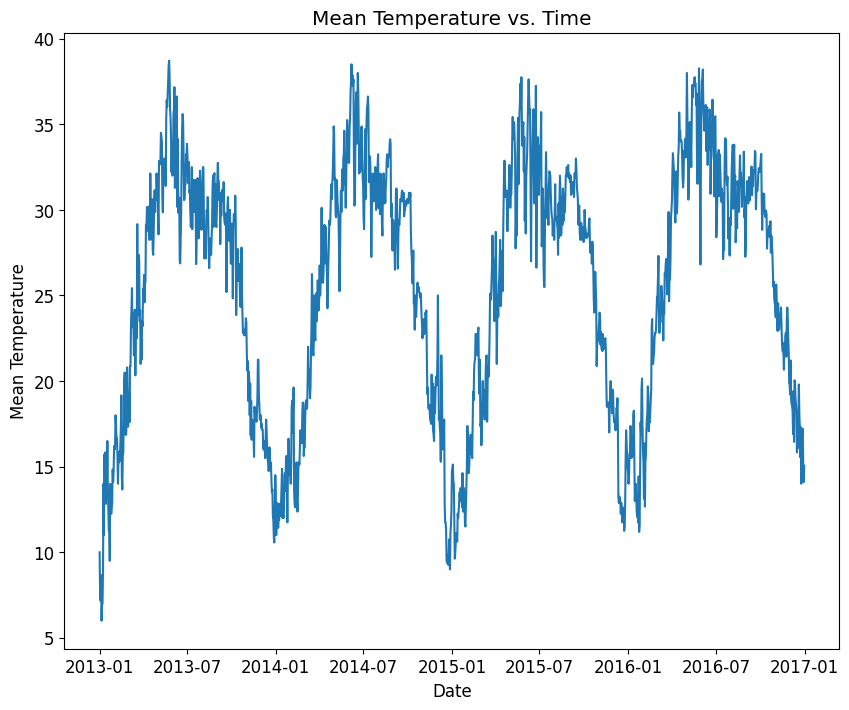

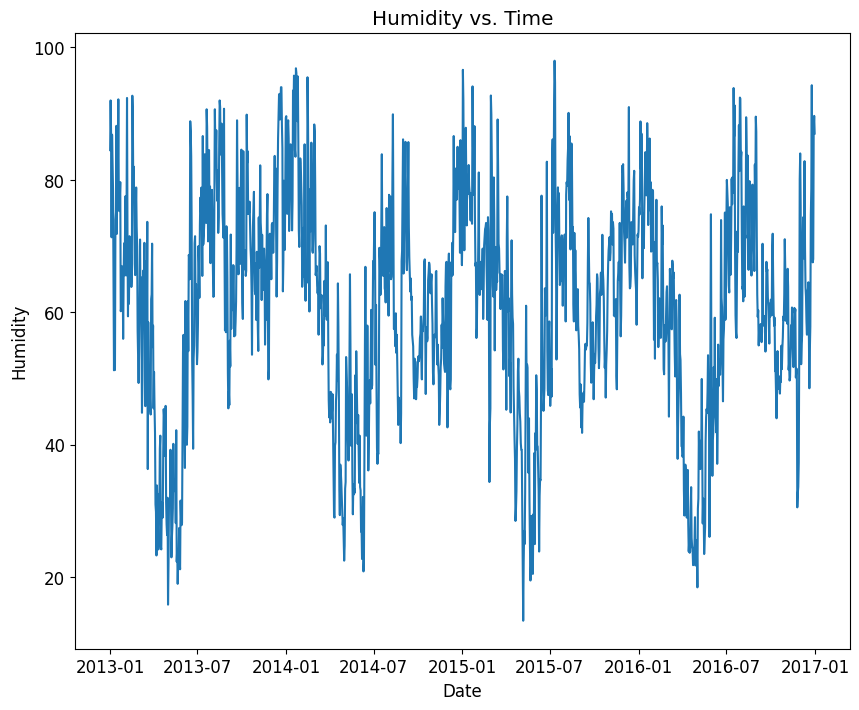

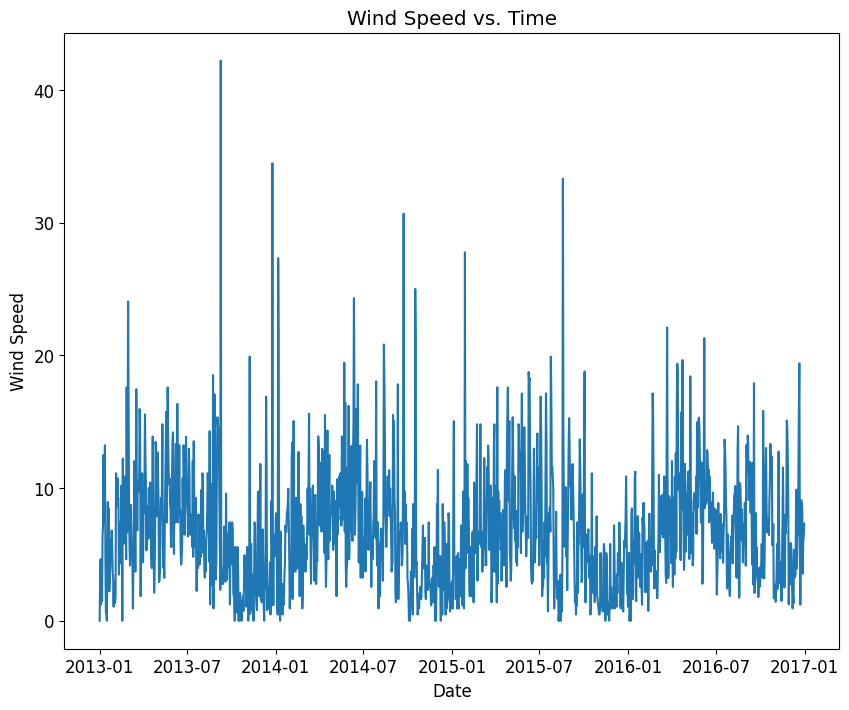

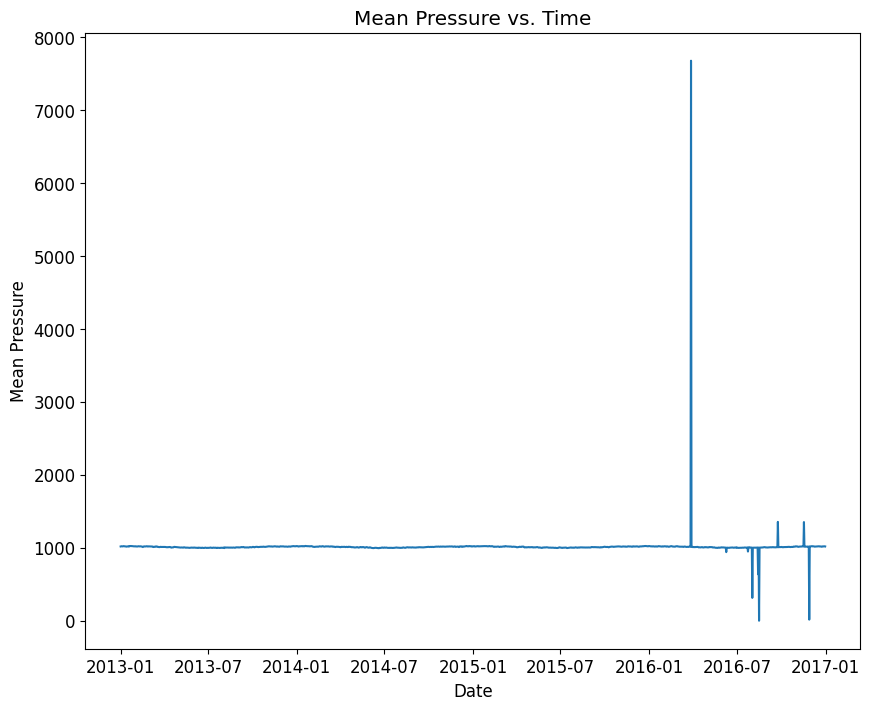

In [11]:
# List of data and corresponding labels
data_columns = [(mean_temperature, 'Mean Temperature'), (humidity, 'Humidity'), (wind_speed, 'Wind Speed'), (meanpressure, 'Mean Pressure')]

# Create individual subplots for each parameter
for i, label in data_columns:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(i.index, i)
    ax.set_xlabel('Date')
    ax.set_ylabel(label)
    ax.set_title(label + ' vs. Time')
    plt.show()


### We can see extreme pressure values in the mean pressure column for 2016. The highest sea-level pressure on Earth occurs in Siberia, where the Siberian High often attains a sea-level pressure above 1,050 hPa (15.2 psi; 31 inHg), with record highs close to 1,085 hPa (15.74 psi; 32.0 inHg). The lowest measurable sea-level pressure is found at the centres of tropical cyclones and tornadoes, with a record low of 870 hPa (12.6 psi; 26 inHg).

Quantiles are the set of values/points that divides the dataset into groups of equal size.

In [12]:
# creating sub groups of data for each year
grouped_2013 = data[data['year'] == '2013']
grouped_2014 = data[data['year'] == '2014']
grouped_2015 = data[data['year'] == '2015']
grouped_2016 = data[data['year'] == '2016']

In [13]:
# Function that calculates extreme temperatuure values
def temperature_extremes(df, quant1, quant2):
  top_5_percent_value = df['meantemp'].quantile(quant1)
  bottom_5_percent_value = df['meantemp'].quantile(quant2)
  top_5_percent = df[df['meantemp'] >= top_5_percent_value]
  bottom_5_percent = df[df['meantemp'] <= bottom_5_percent_value]

  return top_5_percent, bottom_5_percent


In [14]:
# Identify the top 5% hottest days and top 5% coldest days in each year
top_hottest_days_2013, top_coldest_days_2013 = temperature_extremes(grouped_2013, 0.95, 0.05)
top_hottest_days_2014, top_coldest_days_2014 = temperature_extremes(grouped_2014, 0.95, 0.05)
top_hottest_days_2015, top_coldest_days_2015 = temperature_extremes(grouped_2015, 0.95, 0.05)
top_hottest_days_2016, top_coldest_days_2016 = temperature_extremes(grouped_2016, 0.95, 0.05)

In [15]:
top_hottest_days_2013

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2013-05-08,2013,5,8,34.500000,23.000000,9.250000,1001.166667
2013-05-19,2013,5,19,35.333333,22.333333,15.750000,999.666667
2013-05-20,2013,5,20,36.400000,24.200000,7.400000,998.400000
2013-05-21,2013,5,21,36.000000,19.000000,11.371429,998.666667
2013-05-22,2013,5,22,36.750000,22.125000,17.587500,998.625000
2013-05-23,2013,5,23,37.500000,23.333333,13.566667,997.166667
2013-05-24,2013,5,24,38.428571,27.428571,11.385714,996.428571
2013-05-25,2013,5,25,38.714286,22.428571,10.314286,998.142857
2013-05-26,2013,5,26,37.800000,21.200000,10.740000,998.200000


In [16]:
top_coldest_days_2013

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2013-01-01,2013,1,1,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013,1,2,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013,1,3,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013,1,4,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013,1,5,6.000000,86.833333,3.700000,1016.500000
2013-01-06,2013,1,6,7.000000,82.800000,1.480000,1018.000000
2013-01-07,2013,1,7,7.000000,78.600000,6.300000,1020.000000
2013-01-08,2013,1,8,8.857143,63.714286,7.142857,1018.714286
2013-01-10,2013,1,10,11.000000,62.000000,7.400000,1015.666667


In [17]:
top_hottest_days_2014

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2014-05-29,2014,5,29,35.250,40.125,4.4000,999.375
2014-06-04,2014,6,4,35.250,33.125,7.1875,998.125
2014-06-05,2014,6,5,36.875,26.875,8.5625,996.125
2014-06-06,2014,6,6,37.500,27.625,10.2000,994.875
2014-06-07,2014,6,7,38.500,22.750,13.1875,994.000
2014-06-08,2014,6,8,37.625,26.250,6.7250,993.125
2014-06-09,2014,6,9,37.875,32.125,6.0250,993.125
2014-06-10,2014,6,10,37.250,20.875,12.0375,994.750
2014-06-11,2014,6,11,37.625,23.125,14.8125,995.625


In [18]:
top_coldest_days_2014

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2014-01-02,2014,1,2,11.000000,78.375000,8.1000,1020.250
2014-01-06,2014,1,6,11.428571,86.285714,27.3375,1017.625
2014-01-08,2014,1,8,11.875000,76.875000,1.8500,1017.875
2014-01-15,2014,1,15,12.000000,93.500000,0.4625,1019.750
2014-01-17,2014,1,17,12.000000,95.750000,1.1625,1017.625
2014-01-25,2014,1,25,11.750000,95.625000,8.3375,1019.750
2014-12-18,2014,12,18,11.750000,79.750000,3.0125,1021.375
2014-12-19,2014,12,19,11.750000,81.750000,0.4625,1022.125
2014-12-20,2014,12,20,11.250000,77.000000,5.8000,1018.750


In [19]:
top_hottest_days_2015

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2015-05-07,2015,5,7,35.428571,13.428571,15.342857,1003.571429
2015-05-09,2015,5,9,35.125000,27.000000,8.337500,1001.625000
2015-05-10,2015,5,10,35.125000,25.000000,6.962500,1001.375000
2015-05-18,2015,5,18,35.375000,35.750000,5.562500,1000.000000
2015-05-21,2015,5,21,35.625000,24.625000,11.337500,1000.375000
2015-05-22,2015,5,22,36.250000,19.500000,12.512500,998.125000
2015-05-23,2015,5,23,37.375000,21.750000,12.725000,996.125000
2015-05-24,2015,5,24,36.000000,29.250000,5.100000,997.375000
2015-05-25,2015,5,25,37.750000,22.250000,10.875000,996.875000


In [20]:
top_coldest_days_2015

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2015-01-06,2015,1,6,12.000000,79.875,4.4000,1015.500
2015-01-07,2015,1,7,9.625000,86.000,3.9375,1016.625
2015-01-08,2015,1,8,10.000000,87.875,3.4875,1019.125
2015-01-09,2015,1,9,10.625000,80.625,1.6250,1020.125
2015-01-10,2015,1,10,11.125000,73.125,4.4125,1018.875
2015-01-11,2015,1,11,11.000000,80.750,4.8625,1019.125
2015-01-12,2015,1,12,10.625000,79.500,0.9250,1019.500
2015-01-13,2015,1,13,12.250000,77.875,4.8750,1017.125
2015-01-14,2015,1,14,12.000000,82.250,5.1000,1017.500


In [21]:
top_hottest_days_2016

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2016-05-02,2016,5,2,38.000000,18.466667,9.513333,1002.200000
2016-05-13,2016,5,13,37.294118,28.117647,8.070588,1001.352941
2016-05-14,2016,5,14,36.562500,31.875000,4.168750,1003.125000
2016-05-15,2016,5,15,37.250000,29.500000,4.750000,1003.562500
2016-05-16,2016,5,16,37.214286,23.500000,9.020000,1000.800000
2016-05-17,2016,5,17,37.500000,25.812500,9.612500,998.937500
2016-05-18,2016,5,18,37.750000,27.625000,8.450000,997.812500
2016-05-19,2016,5,19,37.375000,40.500000,9.387500,998.625000
2016-05-20,2016,5,20,37.400000,44.200000,8.413333,996.933333


In [22]:
top_coldest_days_2016

,year,month,day,meantemp,humidity,wind_speed,meanpressure
date,,,,,,,
2016-01-01,2016,1,1,14.714286,72.285714,1.057143,1021.142857
2016-01-02,2016,1,2,14.000000,75.875000,2.087500,1021.000000
2016-01-03,2016,1,3,14.375000,74.750000,5.112500,1018.500000
2016-01-15,2016,1,15,13.000000,84.187500,10.775000,1017.000000
2016-01-16,2016,1,16,13.600000,80.066667,11.240000,1014.600000
2016-01-17,2016,1,17,14.000000,77.666667,2.106667,1016.200000
2016-01-18,2016,1,18,13.266667,80.466667,1.480000,1014.733333
2016-01-19,2016,1,19,12.357143,88.571429,4.650000,1015.285714
2016-01-20,2016,1,20,12.066667,84.200000,6.193333,1018.666667


In [23]:
# Create a new column that represents the day of the year.
data['DayOfYear'] = data.index.dayofyear

# Now, pivot the table to get years as columns and days of the year as rows.
pivoted_temp = data.pivot(index='DayOfYear', columns='year', values='meantemp')

# The resulting DataFrame 'pivoted_df' will have years as columns and the temperature for each day as rows.
pivoted_temp

year,2013,2014,2015,2016
DayOfYear,,,,
1,10.000000,13.375,14.750,14.714286
2,7.400000,11.000,14.875,14.000000
3,7.166667,12.500,15.125,14.375000
4,8.666667,12.875,14.125,15.750000
5,6.000000,12.375,14.000,15.833333
...,...,...,...,...
362,10.875000,9.000,17.125,16.850000
363,10.571429,11.125,16.375,17.217391
364,12.375000,11.625,15.500,15.238095


### Heatmap to visualize mean temperatures, humidity, mean pressure and wind speed for each day of the year across different years.

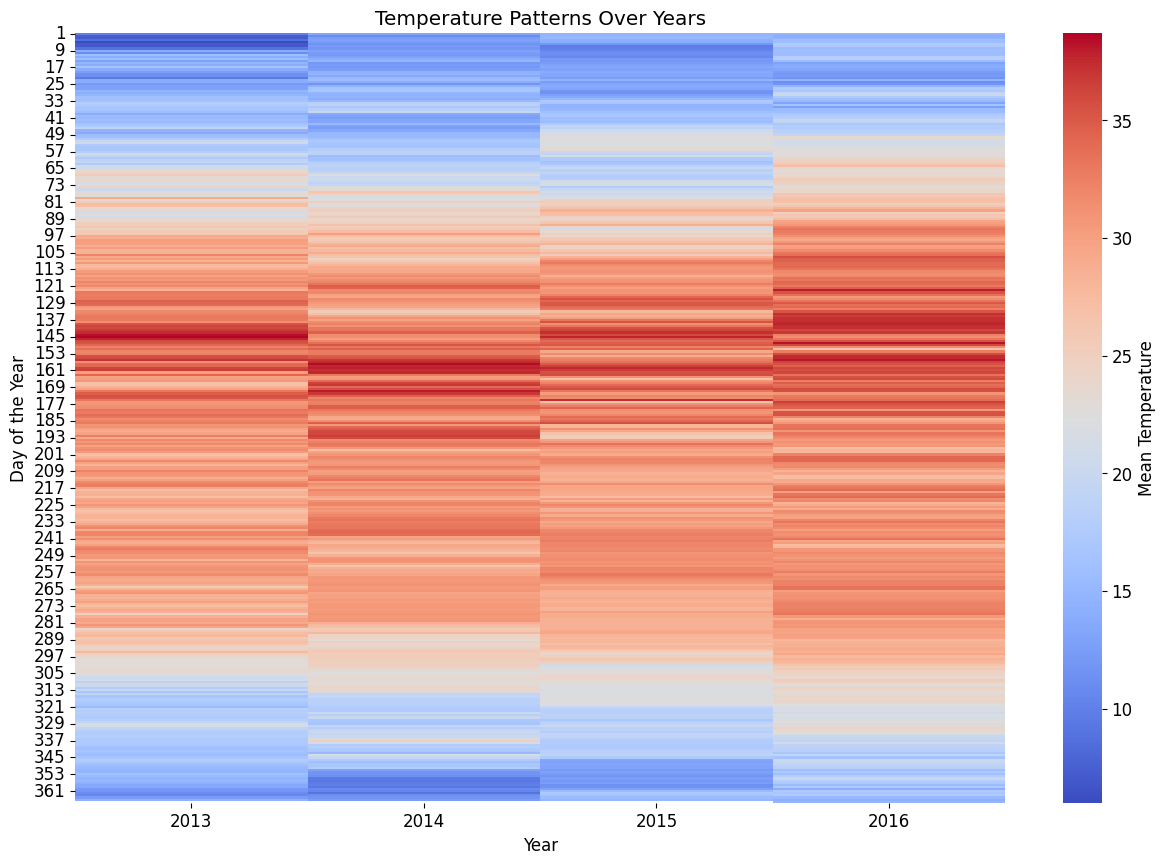

In [24]:
sns.heatmap(pivoted_temp, cmap='coolwarm', cbar_kws={'label': 'Mean Temperature'})
plt.title('Temperature Patterns Over Years')
plt.xlabel('Year')
plt.ylabel('Day of the Year')
plt.savefig('Heatmap.pdf')


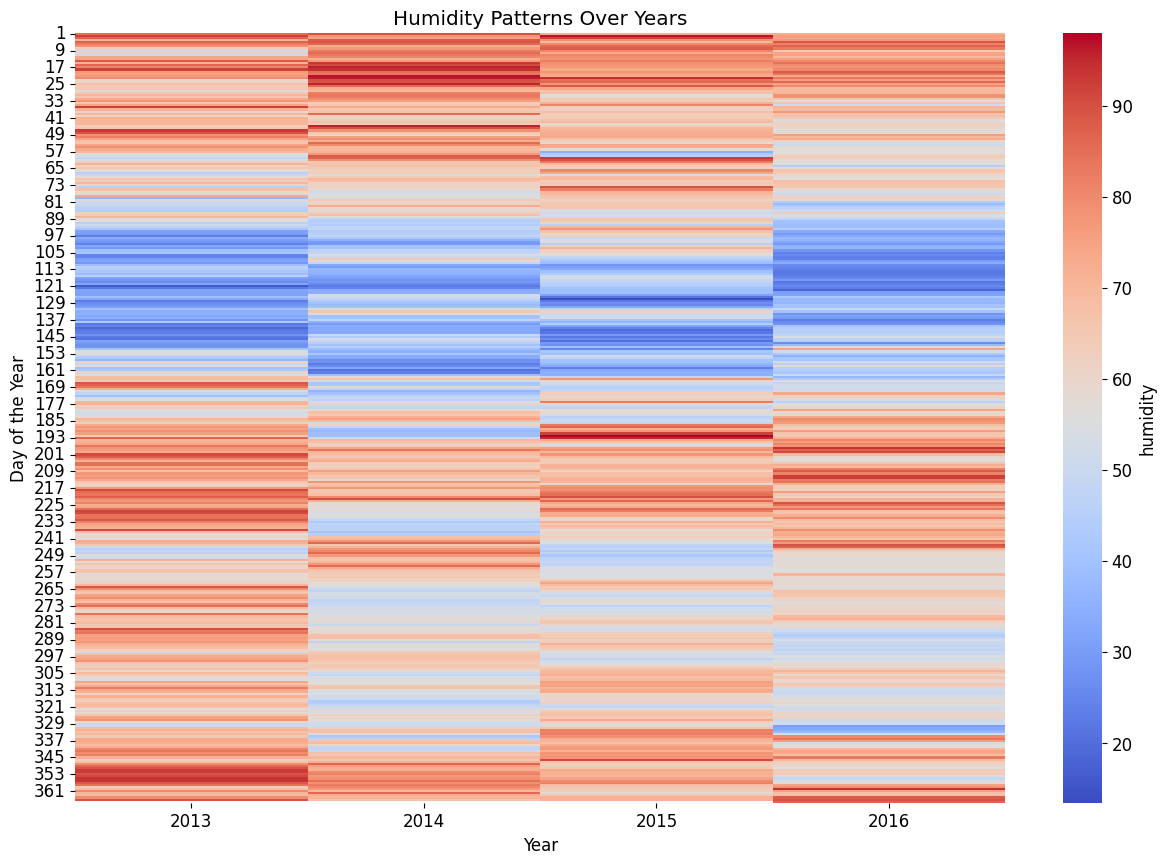

In [25]:
# Now, pivot the table to get years as columns and days of the year as rows.
pivoted_humid = data.pivot(index='DayOfYear', columns='year', values='humidity')

sns.heatmap(pivoted_humid, cmap='coolwarm', cbar_kws={'label': 'humidity'})
plt.title('Humidity Patterns Over Years')
plt.xlabel('Year')
plt.ylabel('Day of the Year')
plt.savefig('Heatmap.pdf')

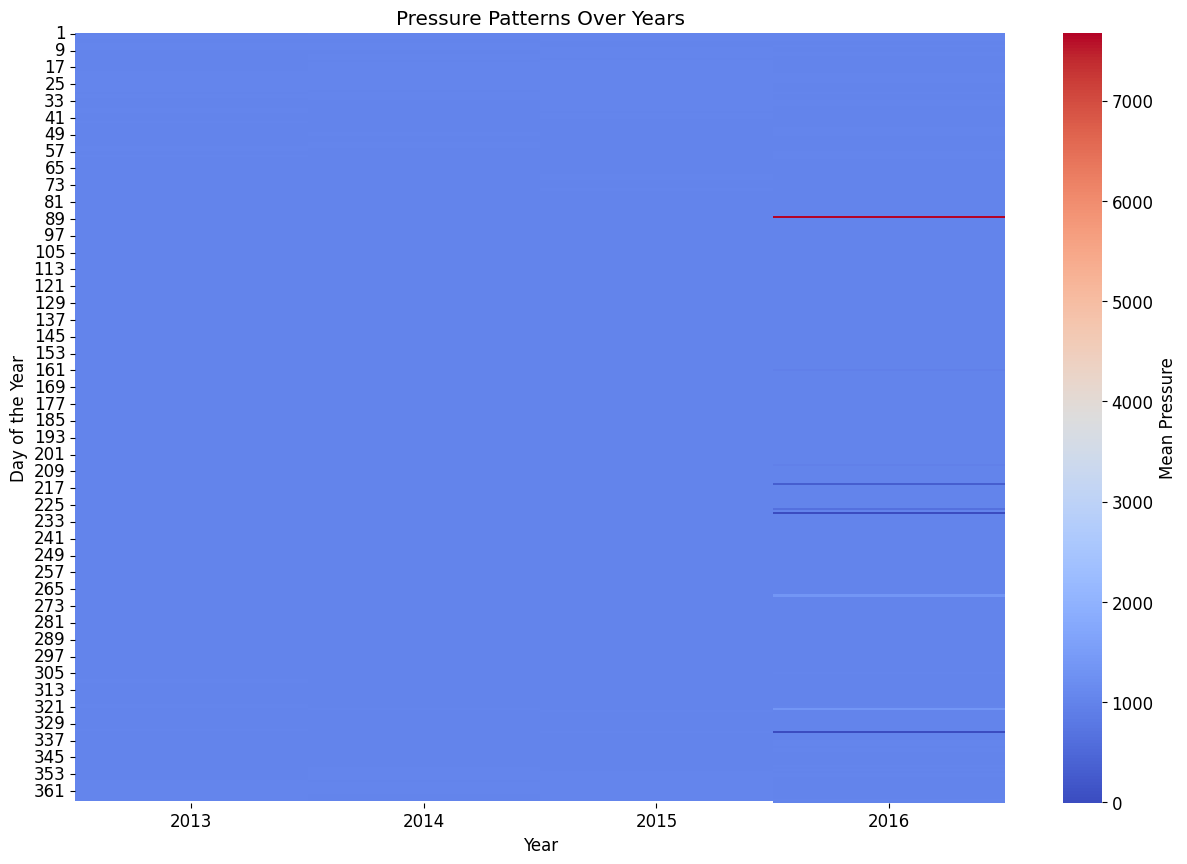

In [26]:
# Now, pivot the table to get years as columns and days of the year as rows.
pivoted_pressure = data.pivot(index='DayOfYear', columns='year', values='meanpressure')

sns.heatmap(pivoted_pressure, cmap='coolwarm', cbar_kws={'label': 'Mean Pressure'})
plt.title('Pressure Patterns Over Years')
plt.xlabel('Year')
plt.ylabel('Day of the Year')
plt.savefig('Heatmap.pdf')

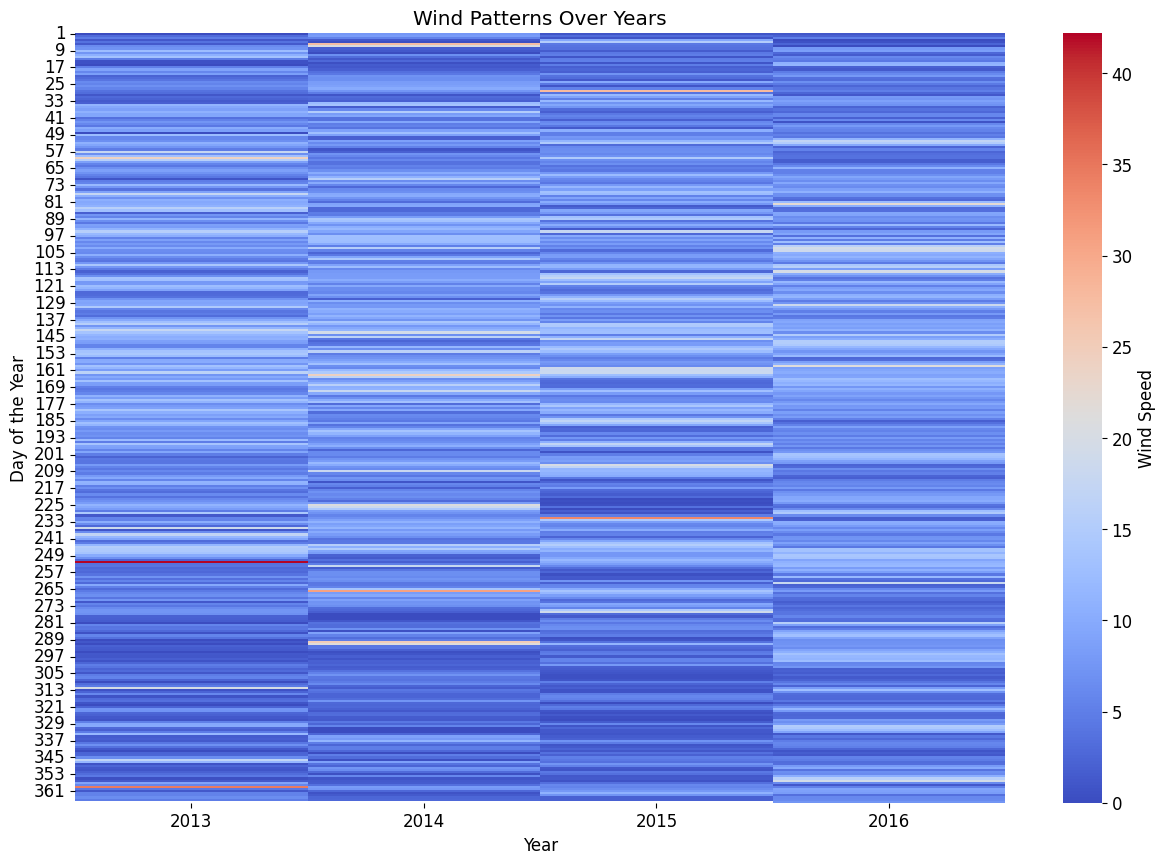

In [27]:
# Now, pivot the table to get years as columns and days of the year as rows.
pivoted_wind = data.pivot(index='DayOfYear', columns='year', values='wind_speed')

sns.heatmap(pivoted_wind, cmap='coolwarm', cbar_kws={'label': 'Wind Speed'})
plt.title('Wind Patterns Over Years')
plt.xlabel('Year')
plt.ylabel('Day of the Year')
plt.savefig('Heatmap.pdf')

### Line plot showing mean temperature in each year

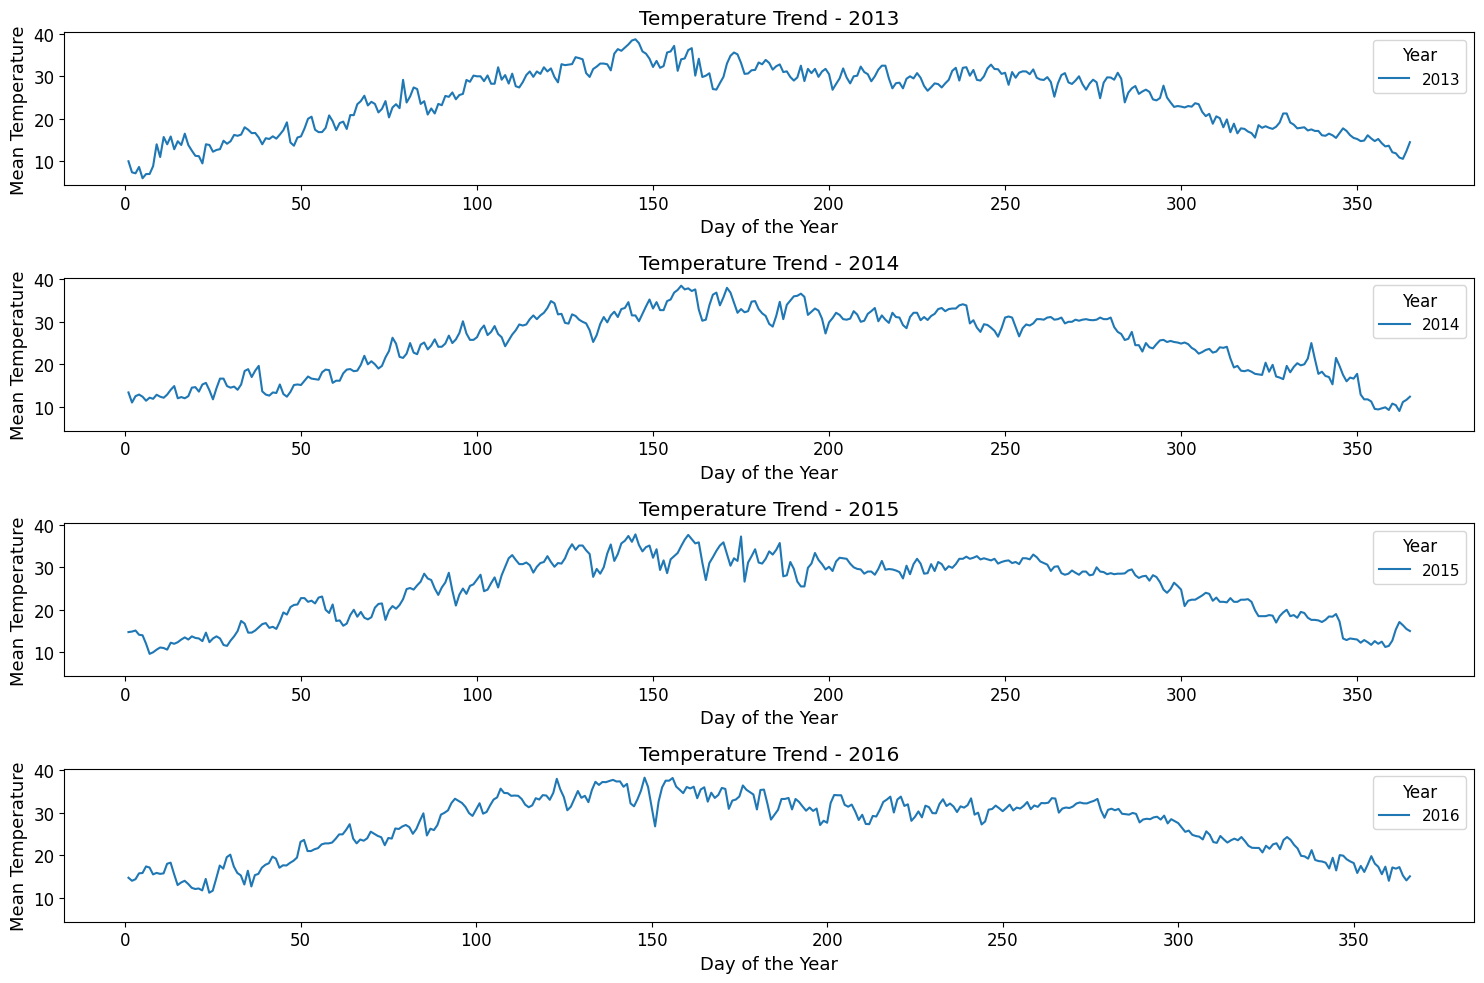

In [29]:
# Number of years
num_years = len(pivoted_temp.columns)

# Set up subplots
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True)

# Iterate through years and plot in separate subplots
for i, year in enumerate(pivoted_temp.columns):
    ax[i].plot(pivoted_temp.index, pivoted_temp[year], label=str(year))
    ax[i].set_title(f'Temperature Trend - {year}')
    ax[i].set_xlabel('Day of the Year', fontsize=13)
    ax[i].set_ylabel('Mean Temperature', fontsize=13)
    ax[i].legend(title='Year', loc='upper right', fontsize=11)

plt.tight_layout()
plt.savefig('line_plotbyyear.pdf')

### Box plots to visualize temperature distributions for each month across different years.

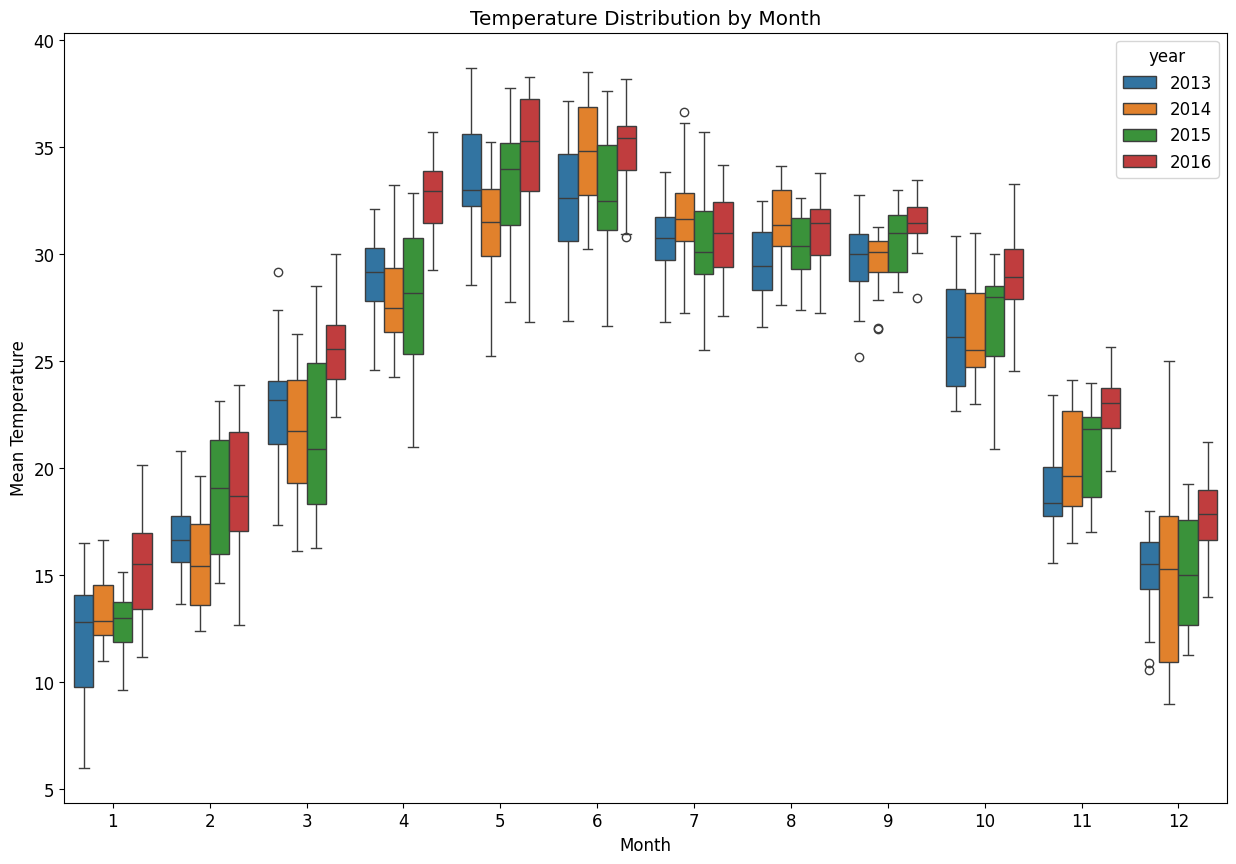

In [30]:
sns.boxplot(x='month', y='meantemp', hue='year', data=data)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.savefig('boxplots.pdf')


#### Seasonal Decomposition

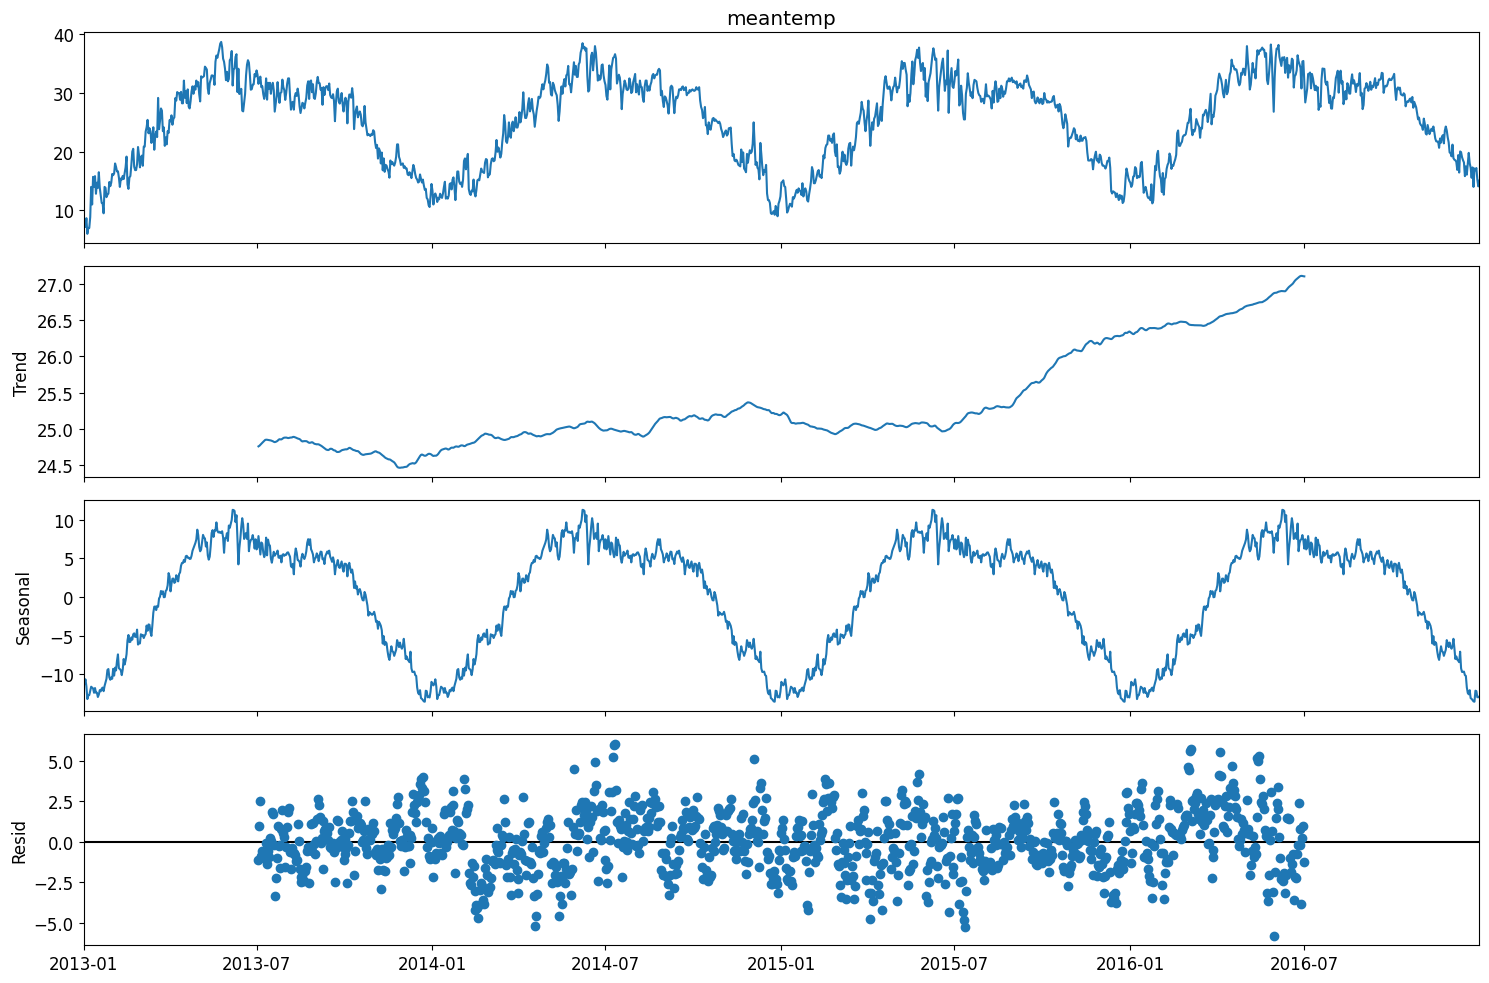

In [31]:
decomposition = sm.tsa.seasonal_decompose(data['meantemp'], model = 'additive', period=366)
fig = decomposition.plot()
plt.savefig('seasonal_decompose.pdf')


#### The dataset exhibits both a linear trend and seasonality, with consistent frequency (representing the width of cycles) and amplitude (indicating the height of cycles) across the entire time series.

#### Correlation Studies

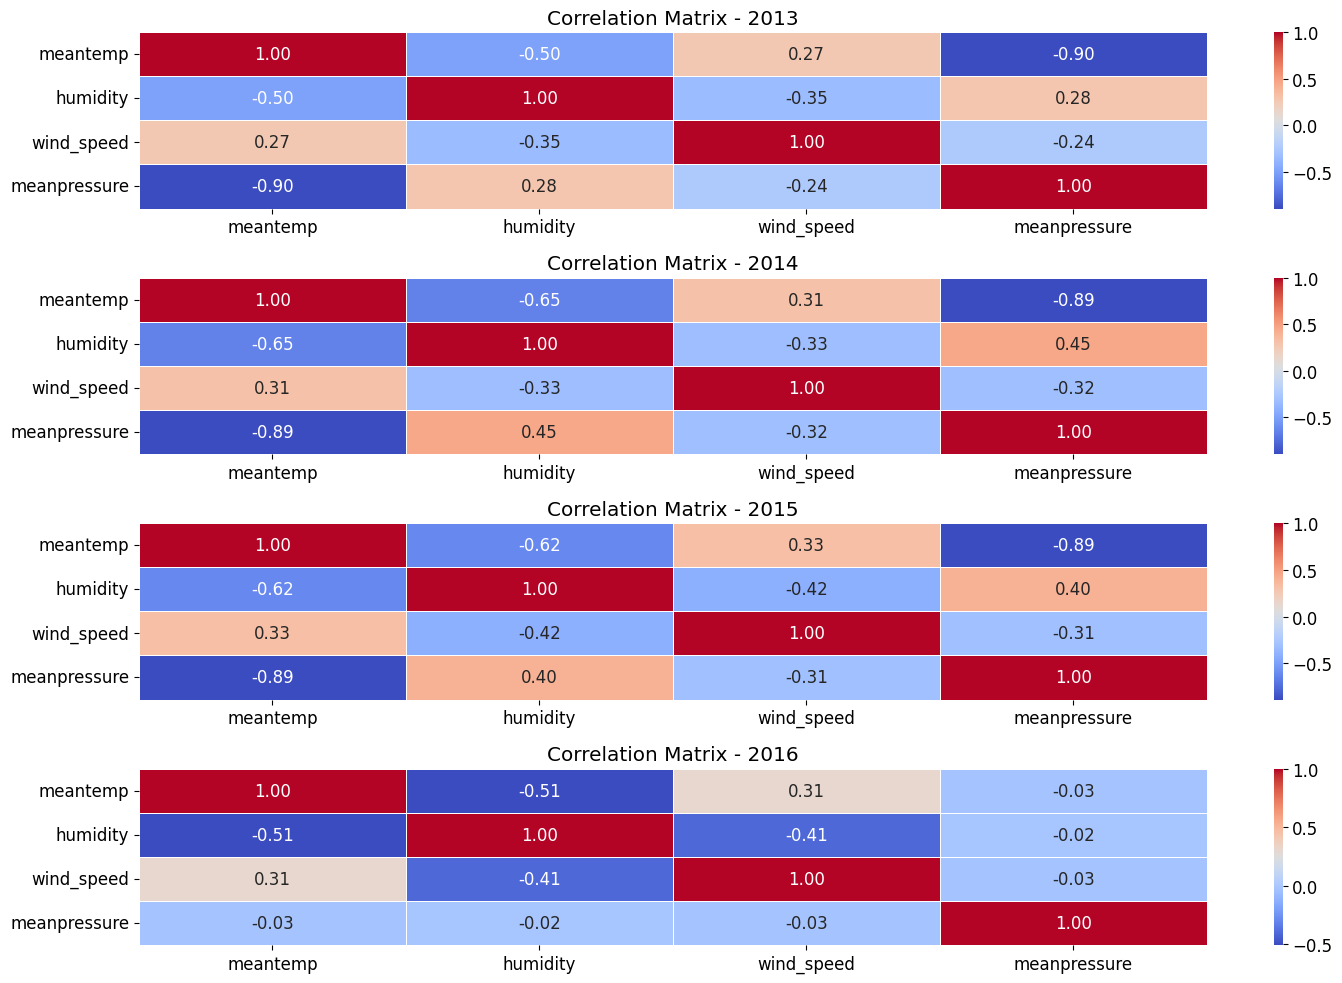

In [32]:
# Group data by year
grouped = data.groupby('year')

# Set up subplots
fig, ax = plt.subplots(4, ncols=1, sharey=True)

# Iterate over grouped data and create correlation matrix and heatmap for each year
for i, (year, group) in enumerate(grouped):
    # Select relevant columns for correlation matrix
    relevant_columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
    group_subset = group[relevant_columns]

    # Calculate correlation matrix
    correlation_matrix = group_subset.corr()

    # Plot heatmap for correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax[i])
    
    # Set subplot title
    ax[i].set_title(f'Correlation Matrix - {year}')

# Adjust layout
plt.tight_layout()
plt.savefig('corr1.pdf')


#### Upon examining the correlation plots for the years 2013, 2014, 2015, and 2016, a consistent pattern emerges in the correlation of features. However, a notable divergence is observed in the mean pressure column for 2016, potentially attributed to the presence of extreme values. In response, an effective strategy to mitigate the impact of outliers is employed – the winsorization method. This technique systematically caps extreme values in numerical columns, with a particular focus on the mean pressure column for the year 2016. Following the winsorization process, a meticulous reassessment of correlation matrices is conducted to ascertain any discernible shifts in the correlation patterns.

#### Winsorization Method

In [33]:
def replace_outliers_IQR(column, multiplier=1.5, strategy='clamp', replace_with=None):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - multiplier * iqr
    high_lim = q3 + multiplier * iqr

    if strategy == 'clamp':
        column = np.where(column >= high_lim, high_lim, np.where(column <= low_lim, low_lim, column))
    elif strategy == 'replace':
        if replace_with is not None:
            column = np.where(column < low_lim, replace_with, column)
            column = np.where(column > high_lim, replace_with, column)
        else:
            raise ValueError("replace_with parameter must be specified when strategy is 'replace'")
    else:
        raise ValueError("Invalid strategy. Supported strategies are 'clamp' and 'replace'.")

    return column


In [34]:
# Group data by year
grouped = data_2.groupby('year')

# Apply the replace_outliers_IQR function to each group's numerical columns
outlier_replaced_data = grouped.transform(replace_outliers_IQR)


# Update the columns in the original DataFrame with the outlier-replaced values
data_2[outlier_replaced_data.columns] = outlier_replaced_data


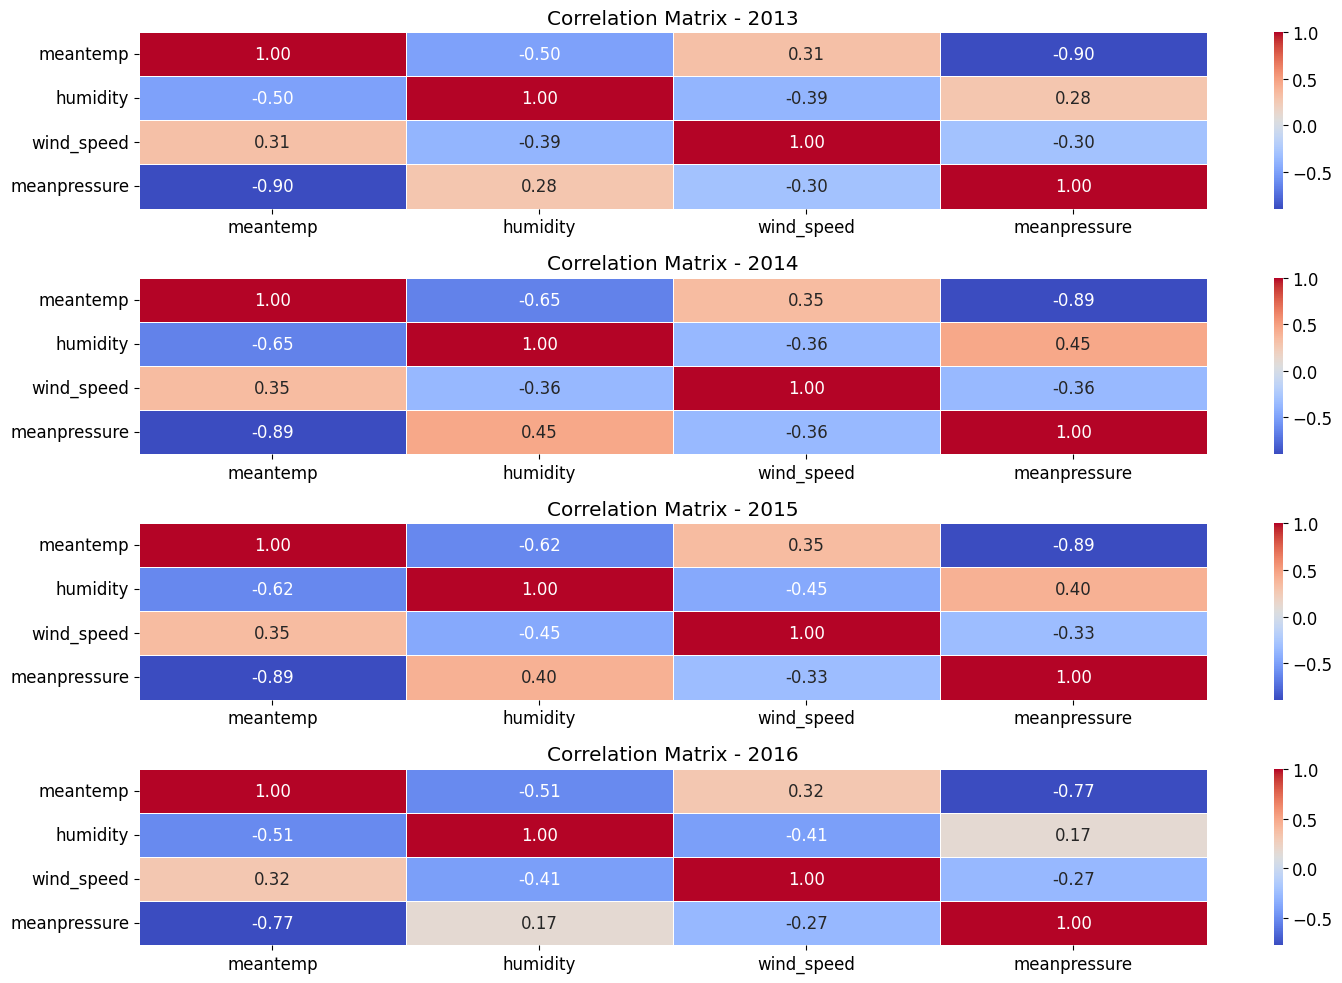

In [35]:
# Group data by year
grouped = data_2.groupby('year')

# Set up subplots
fig, ax = plt.subplots(4, ncols=1, sharey=True)

# Iterate over grouped data and create correlation matrix and heatmap for each year
for i, (year, group) in enumerate(grouped):
    # Select relevant columns for correlation matrix
    relevant_columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
    group_subset = group[relevant_columns]

    # Calculate correlation matrix
    correlation_matrix = group_subset.corr()

    # Plot heatmap for correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax[i])
    
    # Set subplot title
    ax[i].set_title(f'Correlation Matrix - {year}')

# Adjust layout
plt.tight_layout()
plt.savefig('corr2.pdf')